In [27]:
import pandas as pd
import numpy as np

In [105]:
food_data = pd.read_csv('Eavn.csv')
all_data = pd.read_csv('all_hap3.csv')

In [92]:
food_data = food_data.iloc[:, 1:]
food_data

,df_index,delivery_fee,min_order_amount,price1,price2,price3,review_count,loyal_score,category,free_delivery_threshold,...,일식돈까스,족발보쌈,중식,치킨,카페디저트,테이크아웃,편의점,프랜차이즈,피자양식,한식
0,0,2000,9000,15000.0,9000.0,9000.0,716,14.288992,야식,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,10000,8000.0,12000.0,7000.0,695,36.553587,중식,0,...,0,0,1,0,0,0,0,0,0,0
2,20,2000,15000,15000.0,18000.0,18000.0,225,15.572568,프랜차이즈,0,...,0,0,0,0,0,0,0,1,0,0
3,27,3000,9000,6500.0,3000.0,6500.0,566,20.649127,분식,30000,...,0,0,0,0,0,0,0,0,0,0
4,28,3000,9000,2000.0,7000.0,7500.0,566,20.649127,분식,30000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9228,126369,2000,15000,19000.0,16000.0,18000.0,258,15.027510,프랜차이즈,0,...,0,0,0,0,0,0,0,1,0,0
9229,126759,0,14000,3000.0,10000.0,11100.0,202,26.395798,피자양식,0,...,0,0,0,0,0,0,0,0,1,0
9230,126848,3500,9000,9000.0,15000.0,9000.0,217,18.268886,일식돈까스,0,...,1,0,0,0,0,0,0,0,0,0
9231,126930,1000,14000,15000.0,14000.0,15000.0,251,14.065966,야식,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

In [98]:
food_data = food_data[['delivery_fee', 'min_order_amount', 'review_count', 'price1', 'loyal_score', 'gap', '1인분주문', '분식', '야식', '예약픽업',
       '일식돈까스', '족발보쌈', '중식', '치킨', '카페디저트', '테이크아웃', '편의점', '프랜차이즈', '피자양식', '한식']]

food_data = food_data[['delivery_fee', 'min_order_amount','review_count', 'loyal_score', 'gap', '1인분주문', '분식', '야식', '예약픽업',
       '일식돈까스', '족발보쌈', '중식', '치킨', '카페디저트', '테이크아웃', '편의점', '프랜차이즈', '피자양식', '한식']]

In [99]:
from sklearn.model_selection import train_test_split

X_train = food_data.drop(['review_count'], axis=1)
y_train = food_data['review_count']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

In [100]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param = {
    'max_depth':[2,3,4],
    'n_estimators':range(550,700,50),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor(max_depth=7)
grid_search = GridSearchCV(estimator=model, param_grid=param, cv=5, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'colsample_bylevel': 0.7, 'colsample_bytree': 1, 'max_depth': 3, 'n_estimators': 600}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
pred_train = grid_search.predict(X_train)
pred_test = grid_search.predict(X_test)

print('train mae score: ', mean_absolute_error(y_train, pred_train))
print('test mae score:', mean_absolute_error(y_test, pred_test))

train mae score:  98.9491864061601
test mae score: 134.632558131773


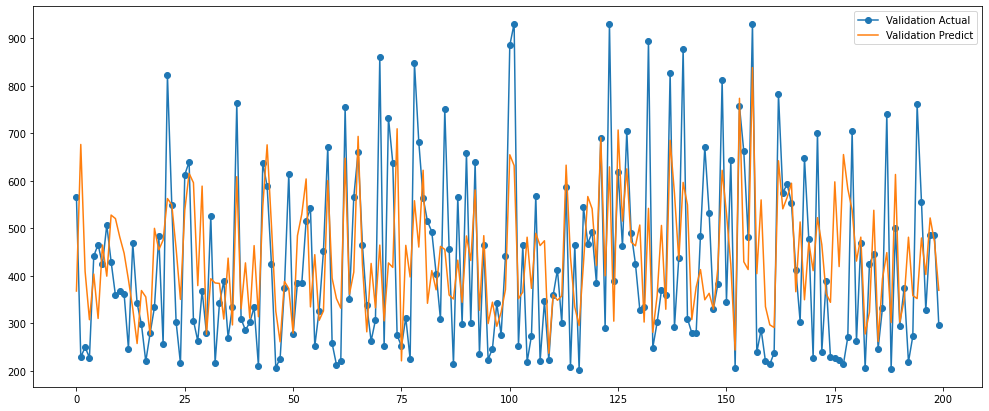

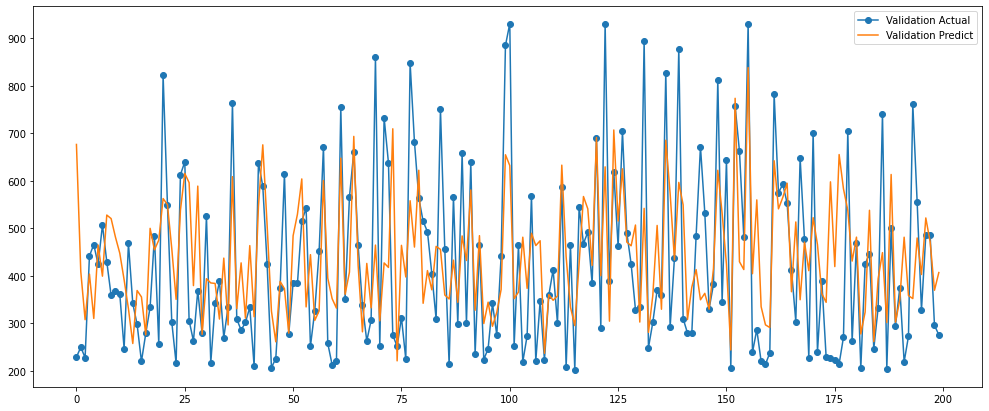

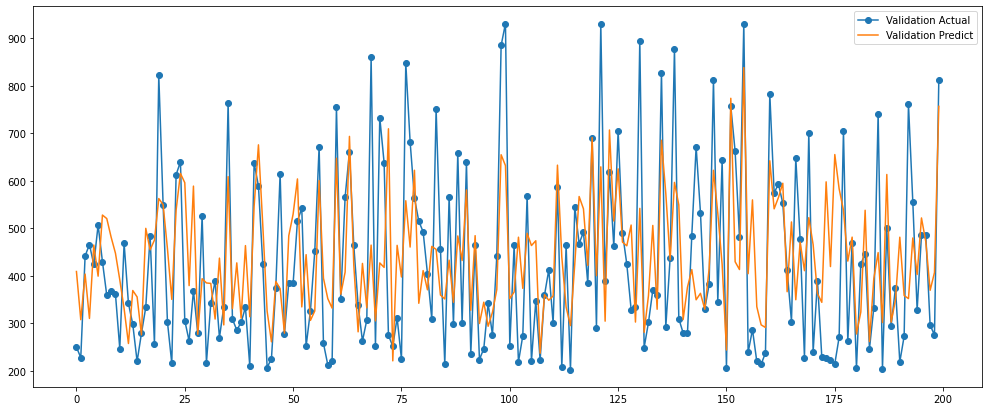

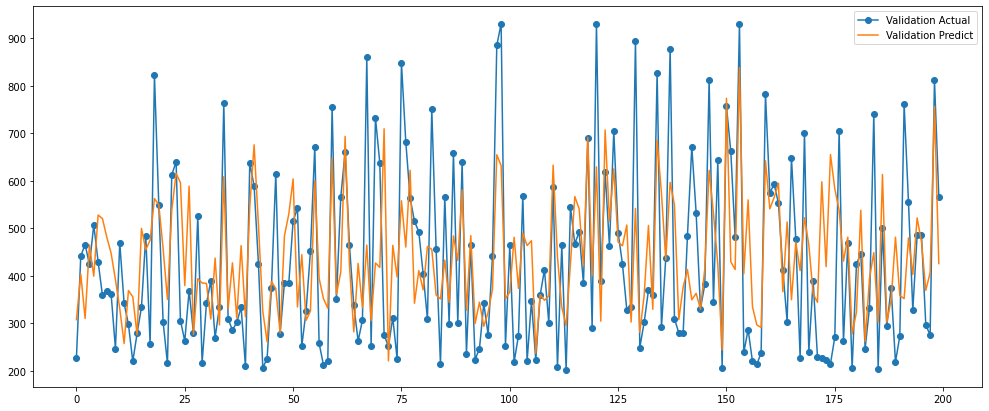

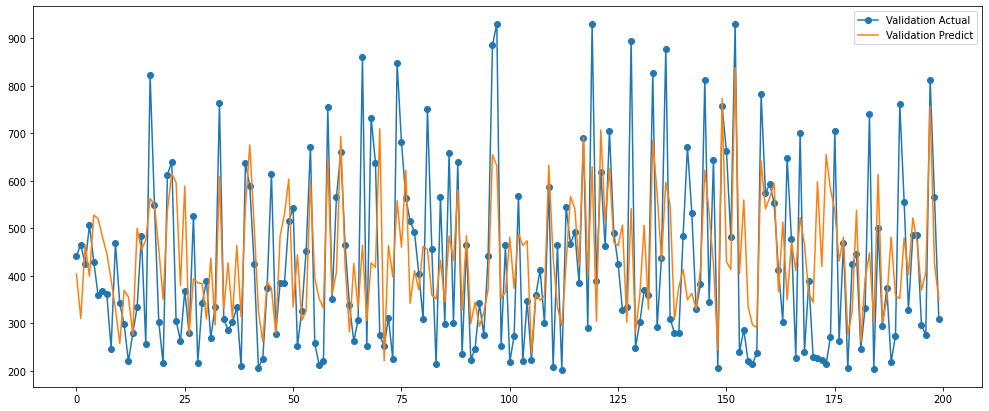

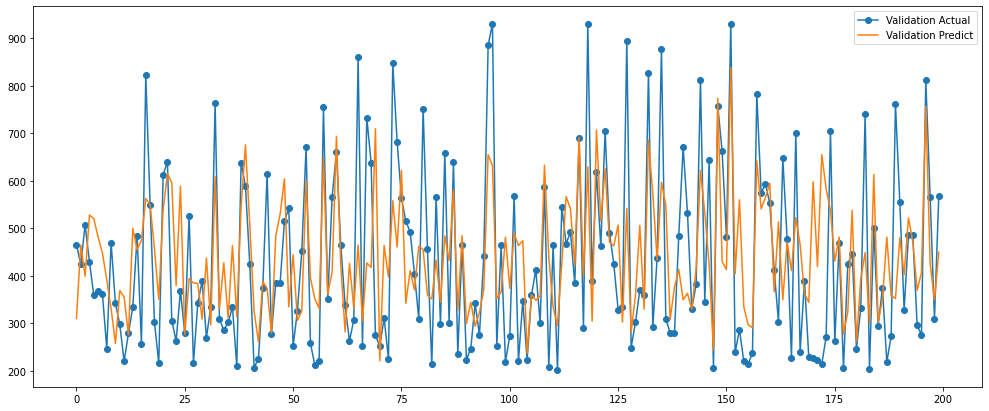

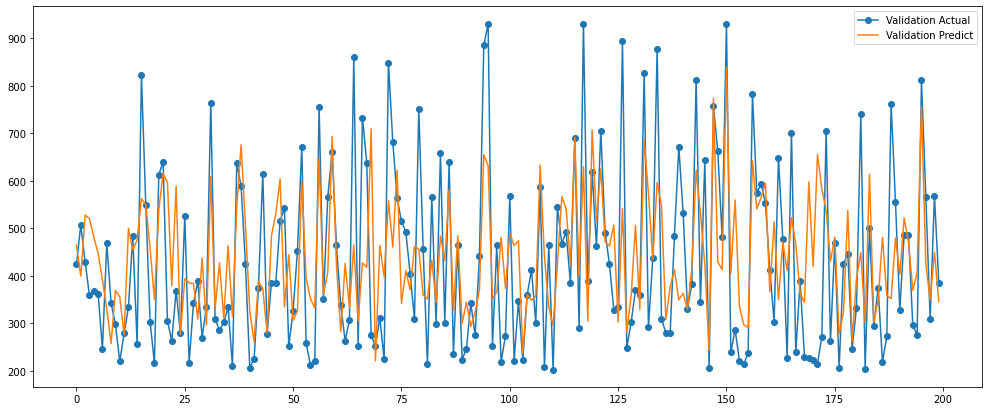

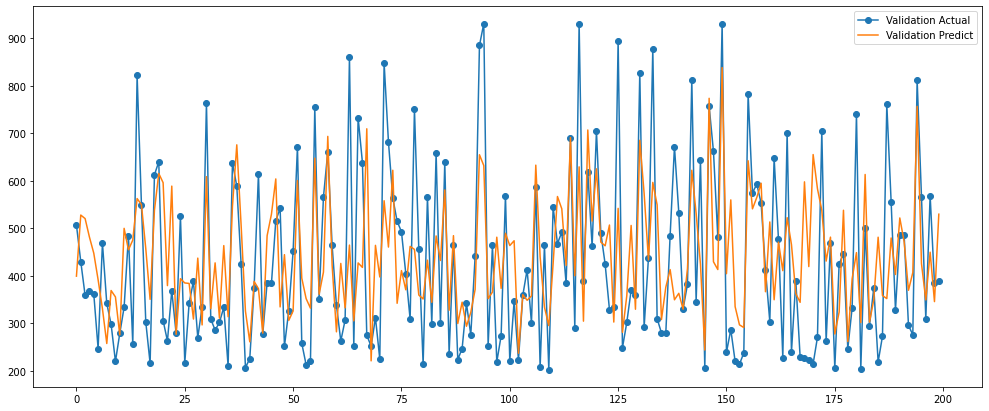

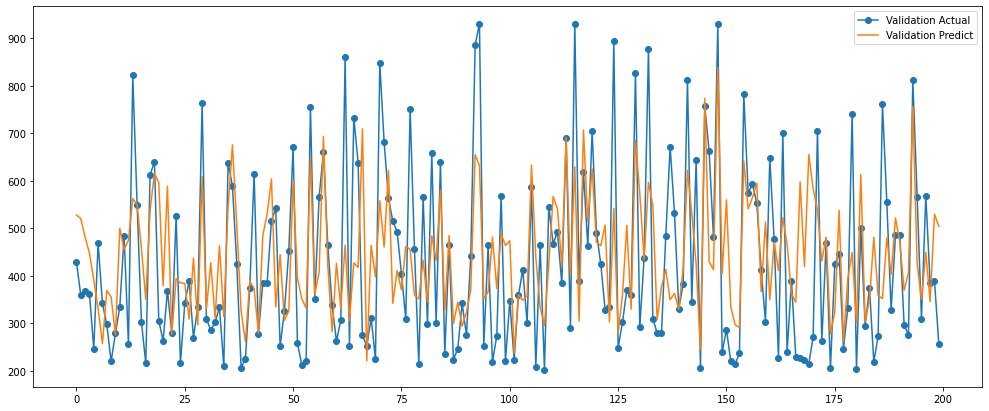

In [26]:
for i in range(9):
    plt.figure(figsize=(17,7))
    plt.plot(range(0, 200), y_test[i : i+200],'o-', label='Validation Actual')
    plt.plot(range(0, 200), pred_test[i : i+200], '-', label='Validation Predict')
    plt.legend()

In [36]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
from sklearn.metrics import mean_squared_error
some_predicted = model.predict(X_test)
mse = np.sqrt(mean_squared_error(some_predicted, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 165.3457906624993
